# what is machine learning
> Field of study that gives computers the ability to learn without being explicitly programmed
> 
>                                                                                   --- Arthur Samuel

##### Supervised Learning
models are given some inputs and the correct outputs of these inputs to make some x-to-y mappings, through these (input, output) pair, machine has the ability to predict or guess the output with the input only
- Regression: **predict a number from many many numbers** 
- classfication: **predict categories from many categories**.  just have finite outputs to choose the final one, different from Regression which could predict a number from infinitely many numbers

##### Unsupervised Learning
- **without 'right answer' for input**
- definition: algorithm has to find **structure** in the data which only comes with inputs $X$, but not output labels $Y$
- clustering algorithm: to group inputs without label into different categories. example: news 
- anomaly detection: find unusual data points
- dimensionality reduction: compress data using few number
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Linear Regression
- A supervised learning model
- we can use **plot** or **data table** to visualize datas

some terminology:
- training set 
- feature: $x$
- target: $y$
- number of training examples: $m$
- training example:$(x^{(i)}, y^{(i)})$

##### how to work
the model $f$ was given features $x$ and make prediction $\hat{y}$.

In Linear Regression with one variable model , f is defined as $f_{w, b}(x) = wx + b$.

the model try to optimize fitting effect by changing the parameters w and b.

-----
$Model: f_{w, b}(x) = wx + b $

w for slope and b for intercept
#### cost function
different <w,b> pairs will determine different lines

what need doing is to find the most fittable <w, b>, which means minimizing cost function
- $\hat{y} = f(x^{(i)}) = wx^{(i)} + b$
- $error = (\hat{y}^{(i)} - y^{(i)})$
- cost function (mean squared error cost function): $J(w, b) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$
- goal : $minimize_{w,b} J(w,b)$

3D example to visualize as a contour map

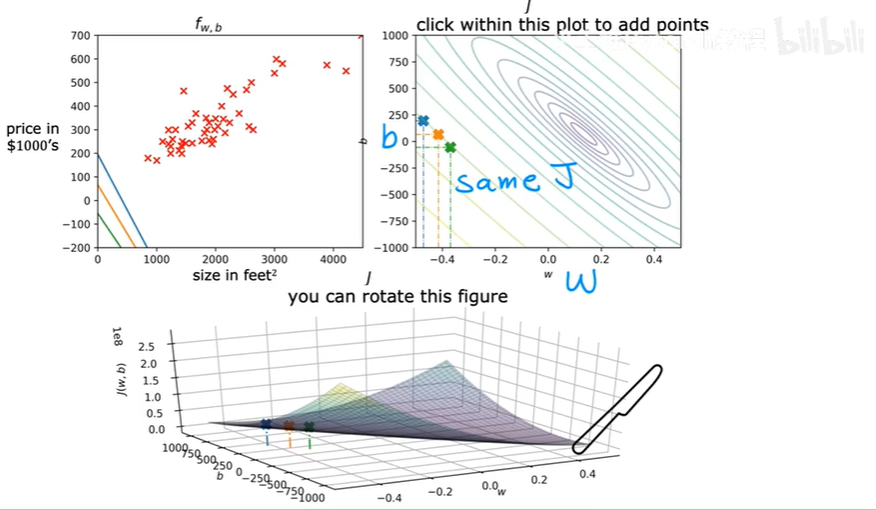

#### gradient descent

goal:$min J(w_1, w_2, w_3, .. , w_n, b)$

Outline
- start with some $w,b$
- keep changing $w,b$ to reduce $J(w, b)$
- until we settle at or near minimum

different starts may have different minimums

Implement
- each step : simultaneously update $w = w - \alpha \frac{\partial}{\partial w} J(w, b) , b = b - \alpha \frac{\partial}{\partial b} J(w, b)$
  - $\alpha$ : learning rate , determine the step each baby step take
  - never make the change of w,b affect the other one'change
  - in Linear Regression(convex function : with only a global minimum): 
    - $\frac{\partial}{\partial w} J(w, b) = \frac{1}{m} \sum(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}$
    - $\frac{\partial}{\partial b} J(w, b) = \frac{1}{m} \sum(f_{w,b}(x^{(i)})-y^{(i)})$
  - Batch gradient descent : each step, we look for every example of the training set

#### multiple features
- $x_j$ for $j^{th}$ feature
- $n$ for number of features
- $\vec{x}^{(i)}$ for features of $i^{(th)}$ training example

$Model$: $f_{\vec{w},b}(\vec{x}) = w_1x_1 + w_2x_2 +...+w_nx_n + b = \vec{w}*\vec{x} + b$
- $\vec{w} = [w_1, w_2, ..., w_n]$
- $b$: a single number
- $\vec{x} = [x_1, x_2, ..., x_n]$

**Vectorization**

make the code easier, faster
```
f = np.dot(w, x) + b
```
why faster: np function use parallel hardware to calculate(* have a test)

**Implement**
- parameters : $w_1, w_2, ..., w_n, b$ or $\vec{w}, b$
- model: $f_{\vec{w}, b}(\vec{x}) = \vec{w}*\vec{x} + b$
- cost function: $J(\vec{w}, b)$
- gradient descent:
  - $w_i = w_i - \alpha \frac{1}{m} \sum (f_{\vec{w}, b}(\vec{x}^{(i)})-y^{(i)})x_i^{(i)}$
  - $b = b - \alpha \frac{1}{m} \sum (f_{\vec{w}, b}(\vec{x}^{(i)})-y^{(i)})$
- (*) Normal equation
  - $\theta = (X^T X)^{-1}X^T \vec{y}$
  - only for linear regression
  - solve for w,b without iterations
  - don't generalize and be slow when n is large

**Feature Scaling**

perform some transformation to the training datas

methods:
- $x_{scaled} = \frac{x}{max_x}$ $\in [0, 1], x_{scaled} = \frac{x - \mu}{max-min}, \in [-1, 1]$
- Z-score normalization: $x_{scaled} = \frac{x - \mu}{\sigma}$, $\mu$ for mean and $\sigma$ for standard deviation


**checking gradient descent fot converge**

- learning curve : plot $J(\vec{w}, b)$, x to be iterations 
  - must always descent , or the alpha may be not proper
- use a $\epsilon$ : if the change of J in one iteration smaller that $\epsilon$, it might has converged

**choose learning rate**
- always have some problems when alpha is too big and be slow when slpha is too small 
- if J ascend with even a very small alpha, it might be wrong with the code
- try a range of alpha : [..., 0.001, 0.01, 0.1, ...]

**Feature Engineering** 

create a new feature by transforming or combining original features


**Polynomial Regression**

$f_{\vec{w}, b}(x) = w_1x + w_2x^2 + .. w_nx^n + w_{n+1}*\sqrt{x} + .. + b$
- in such case , feature scaling is important

**Scikit-learn**

### logistic regression

actually used for classification

**Sigmoid function or logistic function**
- $g(z) = \frac{1}{1+e^{-z}}\ \ \ g(z) \in (0, 1)$

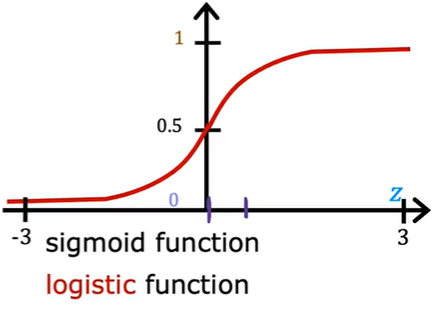

- set $z = \vec{w} \vec{x} + b$
- logistic regression : $f_{\vec{w},b}(\vec{x}) = g(\vec{w} \vec{x} + b) = \frac{1}{1 + e^{-(\vec{w}\vec{x} + b)}}$
- it stands for the "**probability**" that its class is **1**

**Decision boundary**

the line when $\vec{w} \vec{x} + b = 0$, which represents the value $g(z)$ equals to 0.5

$z$ could also be non-linear

**cost function**

why MSE is not proper?

it's not a convex function and may have many local minimuns even when getting on a right way

- $J(\vec{w}, b) = \frac{1}{m} \sum loss$
- $loss(f, y^{(i)}) = -log(f(x^{(i)}))$ when y = 1 or $-log(1-f(x^{(i)}))$ when y = 0
- $J(\vec{w}, b) = -\frac{1}{m} \sum [y^{(i)}log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)})log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$

**gradient descent**
 
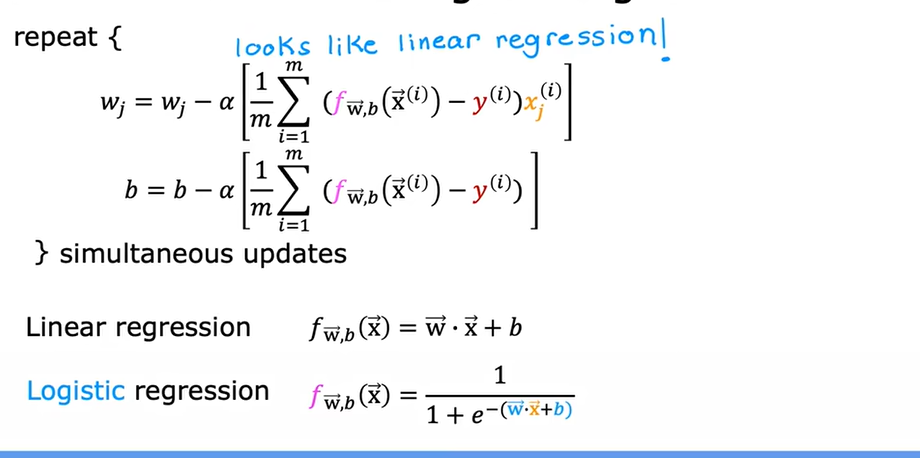

### Overfitting(high variance) and Underfitting(high bias) 

**adrress overfitting**
- collect more training datas
- use fewer features
- regularization

### Regularization

$J(\vec{w}, b) = \frac{1}{2m} \sum (f(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum w_j^2$
- $\lambda$: regularization parameters
- the second one: regularization term (keep parameters small to avoid overfitting)
- choose the proper $\lambda$

**in linear regression**

$J(\vec{w}, b) = \frac{1}{2m} \sum (f(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum w_j^2$

$\frac{\partial}{\partial w_j} J = \frac{1}{m} \sum (f(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m} w_j$

$w_j = (1 - alpha \frac{\lambda}{m}) w_j - alpha \frac{1}{m} \sum (f(x^{(i)}) - y^{(i)})x_j^{(i)}$

**in logistic regression**

similar to above

### deep learning 

### Neural networks

simplified mathematical model of a neuron

**demand prediction**

activation: $a=f(X)=\frac{1}{1+e^{-(wx+b)}}$

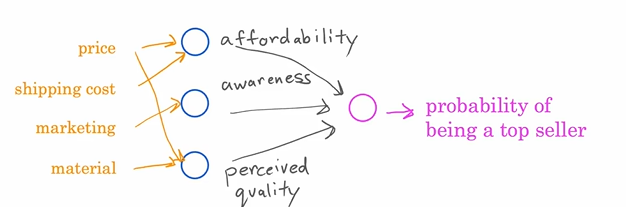

- layer: a layer can hava mutiple neurons
  - input layer + layers in middle called hidden layers + output layer
- $\vec{x} or \vec{a}^{[0]} ----\ \ one\ layer\ \ > \vec{a}^{[i]} ----\ \ \ another\ layer\ \ \ > ... -> \vec{y}$
- like feature engieering, neural network can find better features, but by itself

**neural network layer**

each neural takes on similar process to Logisitic regression

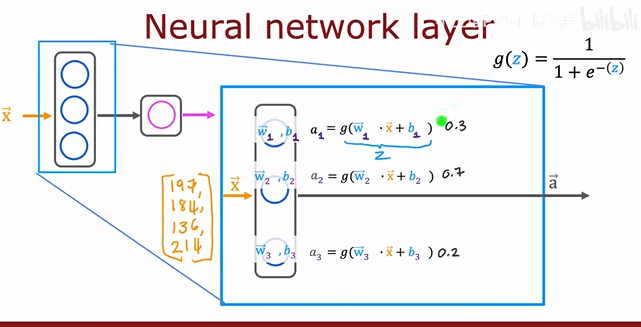

- [i] : the i-th layer of neural network
- $w^{[i]}_j$ : the j-th neuron pf the i-th layer
- $a^{[i]}_j = g(\vec{w}_j^{[i]} a^{[i-1]} + b_j^{[i]})$: the output of i-th layer, use sigmoid as activation function

**Inference algorithm:forward propagation**

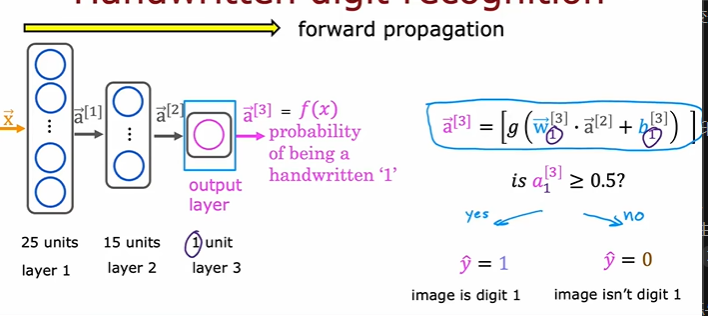

**Tensorflow**

same algorithm can be applied to different applications

see more details in code of HW

- numpy array: [[1, 2]] : (1, 2), [1, 2] , (1, )
- data in Tensorflow: 
- 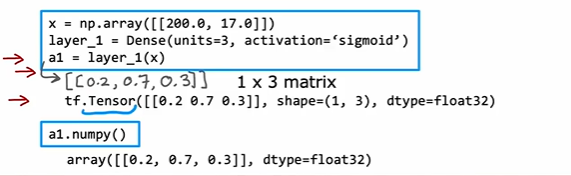

**Building a neural network**

besides one layer by another, you could create layer_1, layer2 and then ***model = Sequential(layer_1, layer_2)***

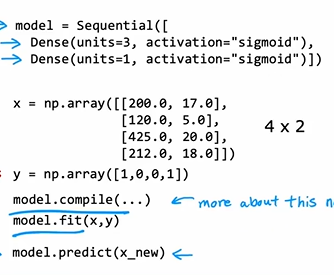

**the code underneath Tensorflow**

forward prop 
take a $\vec{x}$, use sigmoid function to activate